In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#reading the csv file
X = pd.read_csv("Diabetes_XTrain.csv").values
Y = pd.read_csv("Diabetes_YTrain.csv").values
X_test = pd.read_csv("Diabetes_Xtest.csv").values

In [7]:
X.shape

(576, 8)

In [9]:
Y = Y.reshape(-1,)
Y.shape

(576,)

In [10]:
X_test.shape

(192, 8)

In [14]:
np.unique?

In [17]:
s = np.unique(Y,return_counts = True)
s[1]

array([375, 201], dtype=int64)

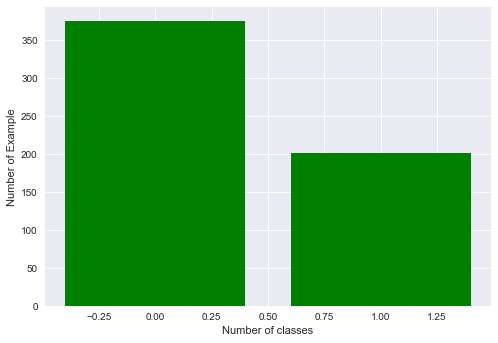

In [110]:
plt.style.use("seaborn")
plt.bar(s[0],s[1],color = "green")
plt.xlabel("Number of classes")
plt.ylabel("Number of Example")
plt.show()

In [100]:
def dist(q,x):
    return np.sqrt(sum((q-x)**2))

def knn(X,Y,q,k=18):
    val = []
    m = X.shape[0]
    for i in range(m):
        d = dist(q,X[i])
        val.append((d,Y[i]))
        
    
    val = sorted(val)
    val = np.array(val)
    val = val[:k]
    new_val = np.unique(val[:,1],return_counts = True)
    index = new_val[1].argmax()
    pred = new_val[0][index]
    
    return pred
    
        

In [101]:
pred = []
for i in range(X_test.shape[0]):
    preds = knn(X,Y,X_test[i])
    pred.append(preds)

In [102]:
pred = np.array(pred)
pred.shape
pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.])

In [103]:
sub = pd.DataFrame({"Outcome" : pred})
sample = sub.to_csv("sample_submission.csv",index = False)

In [104]:
sub.head()

,Outcome
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
